# VMD

* WARNING :: Unused **kwargs: {'msrc': True}.

:: empymod START  ::  v2.1.1

   depth       [m] :  0
   res     [Ohm.m] :  2E+14 100
   aniso       [-] :  1 1
   epermH      [-] :  1 1
   epermV      [-] :  1 1
   mpermH      [-] :  1 1
   mpermV      [-] :  1 1
   direct field    :  Comp. in wavenumber domain
   frequency  [Hz] :  0.01 - 100000 : 501  [min-max; #]
   Hankel          :  DLF (Fast Hankel Transform)
     > Filter      :  Key 201 (2009)
     > DLF type    :  Standard
   Loop over       :  None (all vectorized)
   Source(s)       :  1 dipole(s)
     > x       [m] :  0
     > y       [m] :  0
     > z       [m] :  0
     > azimuth [°] :  0
     > dip     [°] :  90
   Receiver(s)     :  1 dipole(s)
     > x       [m] :  100
     > y       [m] :  0
     > z       [m] :  0
     > azimuth [°] :  0
     > dip     [°] :  90
   Required ab's   :  33

:: empymod END; runtime = 0:00:00.012006 :: 1 kernel call(s)



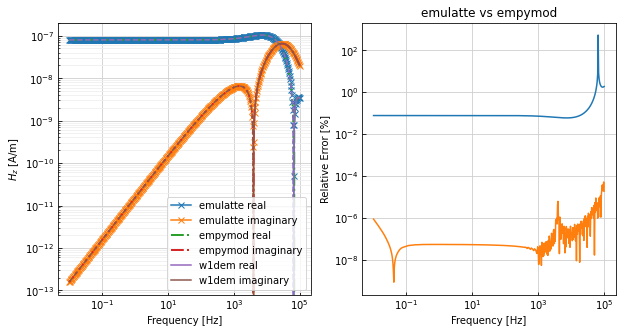

In [14]:
import sys
import numpy as np
import matplotlib.pyplot as plt
import empymod

sys.path.append('../')
import emulatte.forward as fwd
import ex1dem.w1dem as w1dem

#emulatte1.0
thicks = []
res = [2e14, 100]
sc = [0, 0, 0]
rc = [100, 0, 0]
freqs = np.logspace(-2, 5, 501)
props = {'res' : res}

model = fwd.model(thicks)
model.set_properties(res = res)
vmd = fwd.transmitter('VMD', freqs, moment=1)
model.locate(vmd, sc, rc)
ans, freqtime = model.emulate(hankel_filter='key201')

emu_re = ans['h_z'].real
emu_im = ans['h_z'].imag

#empymod
inp = {
    'src' : [0, 0, 0, 0, 90],
    'rec' : [100, 0, 0, 0, 90],
    'depth' : [0, *np.cumsum(thicks)],
    'res' : res,
    'freqtime' : freqs,
    'msrc' : True,
    'mrec' : True,
    'verb' : 3
}
fEM = empymod.loop(**inp)

epm_re = fEM.real
epm_im = fEM.imag

#w1dem
fdtd = 1
tx = [0]
ty = [0]
tz = [0]
rx = [100]
ry = [0]
rz = [0]

dipole_mom = 1
thickness = []
freqtime = np.logspace(-2, 5, 501)
plot_number = len(freqtime)
hankel_filter = "key201"
dbdt = 1
res = np.array([100])

w1dem_fdem = w1dem.Fdem(rx, ry, rz, tx, ty, tz, res, thickness, hankel_filter, fdtd, dbdt, plot_number, freqtime)

bns, _ = w1dem_fdem.vmd(dipole_mom=dipole_mom)
wem = bns['h_z']

w1d_re = wem.real
w1d_im = wem.imag

fig = plt.figure(figsize=(10,5), facecolor='w')
ax = fig.add_subplot(121)
ax.plot(freqtime, emu_re, "C0-x", label='emulatte real')
ax.plot(freqtime, -emu_re, "C0--x")
ax.plot(freqtime, emu_im, "C1-x", label='emulatte imaginary')
ax.plot(freqtime, -emu_im, "C1--x")
ax.plot(freqtime, epm_re, "C2-.", linewidth=2, label='empymod real')
ax.plot(freqtime, -epm_re, "C2:", linewidth=2)
ax.plot(freqtime, epm_im, "C3-.", linewidth=2, label='empymod imaginary')
ax.plot(freqtime, -epm_im, "C3:", linewidth=2)
ax.plot(freqtime, w1d_re, "C4-", label='w1dem real')
ax.plot(freqtime, -w1d_re, "C4--")
ax.plot(freqtime, w1d_im, "C5-", label='w1dem imaginary')
ax.plot(freqtime, -w1d_im, "C5--")

ax.grid(which='major', c='#ccc')
ax.grid(which='minor', c='#eee')
plt.tick_params(which='both', direction='in')
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_xlabel('Frequency [Hz]')
ax.set_ylabel('$H_z$ [A/m]')
ax.legend()

rmspe_real = abs((epm_re - emu_re)/epm_re) * 100
rmspe_imag = abs((epm_im - emu_im)/epm_im) * 100
bx = fig.add_subplot(122)
bx.plot(freqtime, rmspe_real, 'C0-', label='real')
bx.plot(freqtime, rmspe_imag, 'C1-', label='imaginary')
bx.grid(which='major', c='#ccc')
bx.grid(which='minor', c='#eee')
plt.tick_params(which='both', direction='in')
bx.set_yscale('log')
bx.set_xscale('log')
bx.set_xlabel('Frequency [Hz]')
bx.set_ylabel('Relative Error [%]');
bx.set_title('emulatte vs empymod')
plt.show()

# Circular


:: empymod START  ::  v2.1.1

   depth       [m] :  0
   res     [Ohm.m] :  2E+14 100
   aniso       [-] :  1 1
   epermH      [-] :  1 1
   epermV      [-] :  1 1
   mpermH      [-] :  1 1
   mpermV      [-] :  1 1
   direct field    :  Comp. in wavenumber domain
   frequency  [Hz] :  0.1 - 1E+06 : 50  [min-max; #]
   Hankel          :  DLF (Fast Hankel Transform)
     > Filter      :  Key 201 (2009)
     > DLF type    :  Standard
   Loop over       :  None (all vectorized)
   Source(s)       :  1 dipole(s)
     > x       [m] :  50
     > y       [m] :  0
     > z       [m] :  0
     > azimuth [°] :  90
     > dip     [°] :  0
   Receiver(s)     :  1 dipole(s)
     > x       [m] :  0
     > y       [m] :  0
     > z       [m] :  0
     > azimuth [°] :  0
     > dip     [°] :  90
   Required ab's   :  26

:: empymod END; runtime = 0:00:00.002891 :: 1 kernel call(s)



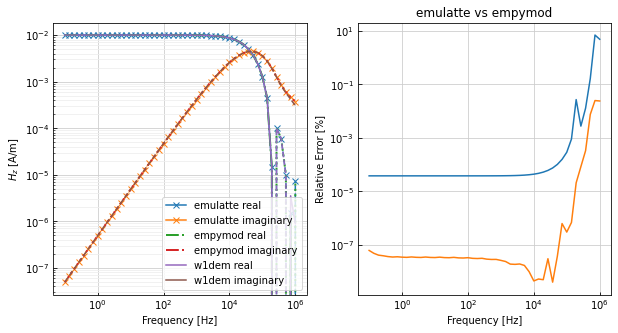

In [13]:
import sys
import numpy as np
import matplotlib.pyplot as plt
import empymod

sys.path.append('../')
import emulatte.forward as fwd
import ex1dem.w1dem as w1dem

#emulatte1.0
thicks = []
res = [2e14, 100]
sc = [0, 0, 0]
rc = [0, 0, 0]
freqs = np.logspace(-1, 6, 50)
props = {'res' : res}

model = fwd.model(thicks)
model.set_properties(res=res)
cl = fwd.transmitter('CircularLoop', freqs, current=1, radius=50, turns=1)
model.locate(cl, sc, rc)
ans, freqtime = model.emulate(hankel_filter='key201', ignore_displacement_current=False)

emu_re = ans['h_z'].real
emu_im = ans['h_z'].imag

#empymod
radius = 50
area = np.pi * radius ** 2
strength = 2 * np.pi * radius
inp = {
    'src' : [50, 0, 0, 90, 0],
    'rec' : [0, 0, 0, 0, 90],
    'depth' : [0, *np.cumsum(thicks)],
    'res' : res,
    'freqtime' : freqs,
    'strength' : strength,
    'mrec' : True,
    'verb' : 3
}
fEM = empymod.bipole(**inp)

epm_re = fEM.real
epm_im = fEM.imag

#w1dem
fdtd = 1
tx = [0]
ty = [0]
tz = [0]
rx = [0]
ry = [0]
rz = [0]

dipole_mom = 1
thickness = []
freqtime = np.logspace(-1, 6, 50)
plot_number = len(freqtime)
hankel_filter = "key201"
dbdt = 1
res = np.array([100])

w1dem_fdem = w1dem.Fdem(rx, ry, rz, tx, ty, tz, res, thickness, hankel_filter, fdtd, dbdt, plot_number, freqtime)

bns, _ = w1dem_fdem.circular_loop(current=1, rad=50, turns=1)
wem = bns['h_z']

w1d_re = wem.real
w1d_im = wem.imag

fig = plt.figure(figsize=(10,5), facecolor='w')
ax = fig.add_subplot(121)
ax.plot(freqtime, emu_re, "C0-x", label='emulatte real')
ax.plot(freqtime, -emu_re, "C0--x")
ax.plot(freqtime, emu_im, "C1-x", label='emulatte imaginary')
ax.plot(freqtime, -emu_im, "C1--x")
ax.plot(freqtime, epm_re, "C2-.", linewidth=2, label='empymod real')
ax.plot(freqtime, -epm_re, "C2:", linewidth=2)
ax.plot(freqtime, epm_im, "C3-.", linewidth=2, label='empymod imaginary')
ax.plot(freqtime, -epm_im, "C3:", linewidth=2)
ax.plot(freqtime, w1d_re, "C4-", label='w1dem real')
ax.plot(freqtime, -w1d_re, "C4--")
ax.plot(freqtime, w1d_im, "C5-", label='w1dem imaginary')
ax.plot(freqtime, -w1d_im, "C5--")

ax.grid(which='major', c='#ccc')
ax.grid(which='minor', c='#eee')
plt.tick_params(which='both', direction='in')
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_xlabel('Frequency [Hz]')
ax.set_ylabel('$H_z$ [A/m]')
ax.legend()

rmspe_real = abs((epm_re - emu_re)/epm_re) * 100
rmspe_imag = abs((epm_im - emu_im)/epm_im) * 100
bx = fig.add_subplot(122)
bx.plot(freqtime, rmspe_real, 'C0-', label='real')
bx.plot(freqtime, rmspe_imag, 'C1-', label='imaginary')
bx.grid(which='major', c='#ccc')
bx.grid(which='minor', c='#eee')
plt.tick_params(which='both', direction='in')
bx.set_yscale('log')
bx.set_xscale('log')
bx.set_xlabel('Frequency [Hz]')
bx.set_ylabel('Relative Error [%]');
bx.set_title('emulatte vs empymod')
plt.show()

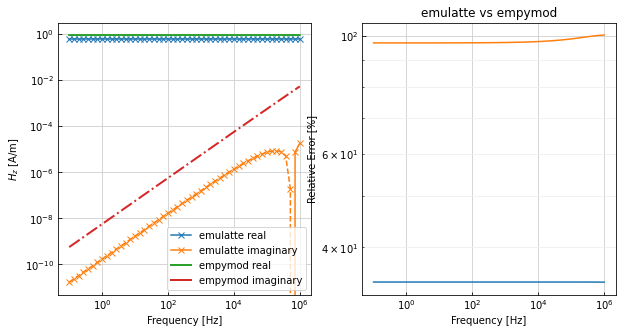

In [17]:
import sys
import numpy as np
import matplotlib.pyplot as plt
import empymod

sys.path.append('../')
import emulatte.forward as fwd
import ex1dem.w1dem as w1dem

#emulatte1.0
thicks = []
res = [2e14, 100]
sc = [0, 0, 0]
rc = [10, 0, 0]
freqs = np.logspace(-1, 6, 50)
props = {'res' : res}

model = fwd.model(thicks)
model.set_properties(res=res)
cl = fwd.transmitter('CircularLoop', freqs, current=1, radius=np.sqrt(1/np.pi), turns=1)
model.locate(cl, sc, rc)
ans, freqtime = model.emulate(hankel_filter='werthmuller201', ignore_displacement_current=False)

emu_re = ans['h_z'].real
emu_im = ans['h_z'].imag

#empymod
radius = np.sqrt(1/np.pi)
gqdiv = 2000
theta = 90
x1 = radius
x2 = radius*np.cos(2*1*np.pi/gqdiv)
y1 = 0
y2 = radius*np.sin(2*1*np.pi/gqdiv)
inp = {
    'src' : [x1, x2, y1, y2, 0, 0],
    'rec' : [0, 0, 0, 0, 90],
    'depth' : [0, *np.cumsum(thicks)],
    'res' : res,
    'freqtime' : freqs,
    'strength' : 1,
    #'msrc' : True,
    'mrec' : True,
    'verb' : 1
}
fEM = empymod.bipole(**inp)
for i in range(1, gqdiv):
    x1 = radius*np.cos(2*i*np.pi/gqdiv)
    y1 = radius*np.sin(2*i*np.pi/gqdiv)
    x2 = radius*np.cos(2*(i+1)*np.pi/gqdiv)
    y2 = radius*np.sin(2*(i+1)*np.pi/gqdiv)
    inp['src'] = [x1, x2, y1, y2, 0, 0]
    fEM += empymod.bipole(**inp)

epm_re = fEM.real
epm_im = fEM.imag

#w1dem
fdtd = 1
tx = [0]
ty = [0]
tz = [0]
rx = [0]
ry = [0]
rz = [0]

dipole_mom = 1
thickness = []
freqtime = np.logspace(-1, 6, 50)
plot_number = len(freqtime)
hankel_filter = "werthmuller201"
dbdt = 1
res = np.array([100])

w1dem_fdem = w1dem.Fdem(rx, ry, rz, tx, ty, tz, res, thickness, hankel_filter, fdtd, dbdt, plot_number, freqtime)

bns, _ = w1dem_fdem.circular_loop(current=1, rad=50, turns=1)
wem = bns['h_z']

w1d_re = wem.real
w1d_im = wem.imag

fig = plt.figure(figsize=(10,5), facecolor='w')
ax = fig.add_subplot(121)
ax.plot(freqtime, emu_re, "C0-x", label='emulatte real')
ax.plot(freqtime, -emu_re, "C0--x")
ax.plot(freqtime, emu_im, "C1-x", label='emulatte imaginary')
ax.plot(freqtime, -emu_im, "C1--x")
ax.plot(freqtime, epm_re, "C2-", linewidth=2, label='empymod real')
ax.plot(freqtime, -epm_re, "C2-.", linewidth=2)
ax.plot(freqtime, epm_im, "C3-", linewidth=2, label='empymod imaginary')
ax.plot(freqtime, -epm_im, "C3-.", linewidth=2)
#ax.plot(freqtime, w1d_re, "C4:", label='w1dem real')
#ax.plot(freqtime, -w1d_re, "C4:")
#ax.plot(freqtime, w1d_im, "C5:", label='w1dem imaginary')
#ax.plot(freqtime, -w1d_im, "C5:")

ax.grid(which='major', c='#ccc')
ax.grid(which='minor', c='#eee')
plt.tick_params(which='both', direction='in')
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_xlabel('Frequency [Hz]')
ax.set_ylabel('$H_z$ [A/m]')
ax.legend()

rmspe_real = abs((epm_re - emu_re)/epm_re) * 100
rmspe_imag = abs((epm_im - emu_im)/epm_im) * 100
bx = fig.add_subplot(122)
bx.plot(freqtime, rmspe_real, 'C0-', label='real')
bx.plot(freqtime, rmspe_imag, 'C1-', label='imaginary')
bx.grid(which='major', c='#ccc')
bx.grid(which='minor', c='#eee')
plt.tick_params(which='both', direction='in')
bx.set_yscale('log')
bx.set_xscale('log')
bx.set_xlabel('Frequency [Hz]')
bx.set_ylabel('Relative Error [%]');
bx.set_title('emulatte vs empymod')
plt.show()

In [1]:
import sys
import numpy as np
import matplotlib.pyplot as plt
import empymod

sys.path.append('../')
import emulatte.forward as fwd
import ex1dem.w1dem as w1dem

#emulatte1.0
thicks = []
res = [2e14, 100]
sc = [0, 0, 0]
rc = [0, 0, 0]
freqs = 1
props = {'res' : res}

model = fwd.model(thicks)
model.set_properties(res=res)
cl = fwd.transmitter('CircularLoop', freqs, current=1, radius=50, turns=1)
model.locate(cl, sc, rc)
ans, freqtime = model.emulate(hankel_filter='key201')

#w1dem
fdtd = 1
tx = [0]
ty = [0]
tz = [0]
rx = [0]
ry = [0]
rz = [0]

dipole_mom = 1
thickness = []
freqtime = np.logspace(-1, 6, 50)
plot_number = len(freqtime)
hankel_filter = "key201"
dbdt = 1
res = np.array([100])

w1fd = w1dem.Fdem(rx, ry, rz, tx, ty, tz, res, thickness, hankel_filter, fdtd, dbdt, plot_number, freqtime)

bns, _ = w1fd.circular_loop(current=1, rad=50, turns=1)

/Users/quetzal/Geophysics/GitHub/Repos/emulatte/test/../emulatte/core/emlayers.py:140: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  rot_matrix = np.array([[cos_theta, sin_theta, 0], [-sin_theta, cos_theta, 0], [0, 0, 1]])


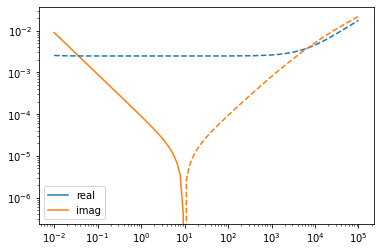

In [7]:
import sys
import numpy as np
import matplotlib.pyplot as plt
import empymod

sys.path.append('../')
import emulatte.forward as fwd
import ex1dem.w1dem as w1dem

#emulatte1.0
thicks = []
res = [2e14, 100]
sc = [(0, 0, 0),(100, 100, 0)]
rc = [50, 50, -50]
freqs = np.logspace(-2,5,100)
props = {'res' : res}

model = fwd.model(thicks)
model.set_properties(res=res)
GW = fwd.transmitter('GroundedWire', freqs, current=1, nsplit=100)
model.locate(GW, sc, rc)
ans, freqtime = model.emulate(hankel_filter='key201')

plt.plot(freqtime, ans["e_x"].real, 'C0-', label='real')
plt.plot(freqtime, ans["e_x"].imag, 'C1-', label='imag')
plt.plot(freqtime, -ans["e_x"].real, 'C0--')
plt.plot(freqtime, -ans["e_x"].imag, 'C1--')
plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.savefig('fig1.png')


:: empymod START  ::  v2.1.1

   depth       [m] :  0
   res     [Ohm.m] :  2E+14 100
   aniso       [-] :  1 1
   epermH      [-] :  1 1
   epermV      [-] :  1 1
   mpermH      [-] :  1 1
   mpermV      [-] :  1 1
   direct field    :  Comp. in wavenumber domain
   frequency  [Hz] :  0.01 - 100000 : 100  [min-max; #]
   Hankel          :  DLF (Fast Hankel Transform)
     > Filter      :  Key 201 (2009)
     > DLF type    :  Standard
   Loop over       :  None (all vectorized)
   Source(s)       :  1 bipole(s)
     > intpts      :  1 (as dipole)
     > length  [m] :  141.421
     > strength[A] :  0
     > x_c     [m] :  50
     > y_c     [m] :  50
     > z_c     [m] :  0
     > azimuth [°] :  45
     > dip     [°] :  0
   Receiver(s)     :  1 dipole(s)
     > x       [m] :  50
     > y       [m] :  50
     > z       [m] :  -50
     > azimuth [°] :  90
     > dip     [°] :  0
   Required ab's   :  21 22
* WARNING :: Offsets < 0.001 m are set to 0.001 m!

:: empymod END; runtime = 0:00

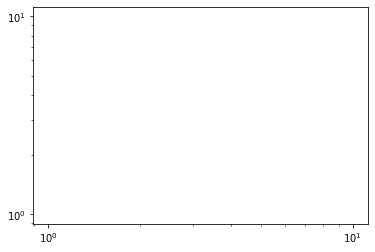

In [7]:
inp = {
    'src' : [0, 100, 0, 100, 0, 0],
    'rec' : [50, 50, -50, 0, 0],
    'depth' : [0],
    'res' : [2e14, 100],
    'freqtime' : freqs,
    'verb' : 3
}
fEM = empymod.bipole(**inp)

epm_re = fEM.real
epm_im = fEM.imag

plt.plot(freqs, epm_re)
plt.plot(freqs, epm_im)
plt.plot(freqs, -epm_re)
plt.plot(freqs, -epm_im)
plt.xscale('log')
plt.yscale('log')

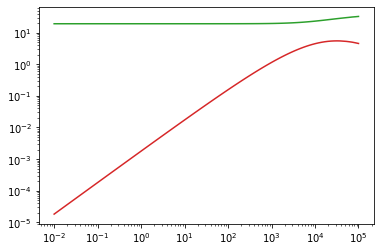

In [2]:
import sys
import numpy as np
import matplotlib.pyplot as plt
import empymod

sys.path.append('../')
import emulatte.forward as fwd
import ex1dem.w1dem as w1dem

#emulatte1.0
thicks = []
res = [2e14, 100]
sc = [(0, 0, 0)]
rc = [50, 50, -50]
freqs = np.logspace(-2,5,100)
props = {'res' : res}

model = fwd.model(thicks)
model.set_properties(res=res)
GW = fwd.transmitter('CoincidentLoop', freqs, current=1, radius=10, turns=4)
model.locate(GW, sc, rc)
ans, freqtime = model.emulate(hankel_filter='key201')

plt.plot(freqtime, ans["h_z"].real)
plt.plot(freqtime, ans["h_z"].imag)
plt.plot(freqtime, -ans["h_z"].real)
plt.plot(freqtime, -ans["h_z"].imag)
plt.xscale('log')
plt.yscale('log')

/Users/quetzal/Geophysics/GitHub/Repos/emulatte/test/../emulatte/core/emlayers.py:140: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  rot_matrix = np.array([[cos_theta, sin_theta, 0], [-sin_theta, cos_theta, 0], [0, 0, 1]], dtype=object)
/Users/quetzal/opt/anaconda3/envs/origin/lib/python3.9/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


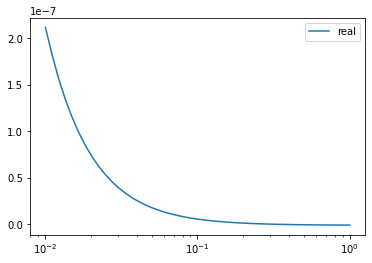

In [11]:
import sys
import numpy as np
import matplotlib.pyplot as plt
import empymod

sys.path.append('../')
import emulatte.forward as fwd
import ex1dem.w1dem as w1dem

#emulatte1.0
thicks = []
res = [2e14, 100]
sc = [(0, 0, 0),(100, 100, 0)]
rc = [50, 50, 50]
freqs = np.logspace(-2,0,20)
props = {'res' : res}

model = fwd.model(thicks)
model.set_properties(res=res)
GW = fwd.transmitter('GroundedWire', freqs, current=1, nsplit=10)
model.locate(GW, sc, rc)
ans, freqtime = model.emulate(hankel_filter='werthmuller201', td_transform='DLAG')

plt.plot(freqtime, ans["e_x"], 'C0-', label='real')
plt.xscale('log')
# plt.yscale('log')
plt.legend()
plt.savefig('fig1.png')